In [4]:
# impot libaray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## data preprocessing

In [6]:
# import dataset
data =pd.read_csv("/content/dataset-symptoms.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# check missing values
data.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [9]:
# break dataset into feature and target vallue
x=data[["Symptom_1","Symptom_2","Symptom_3"]]
y=data['Disease']

In [10]:
# convert categrical data to numaric using one hot encoding
x=pd.get_dummies(x)

In [11]:
# split into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
# feature Scaling using StandardScalar
from sklearn.preprocessing import StandardScaler
Standard=StandardScaler()
x_train=Standard.fit_transform(x_train)
x_test=Standard.fit_transform(x_test)


### Logistic Regression

In [13]:
# apply logistic regression
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# test the logistic regression
lr_y_pred=model.predict(x_test)

In [15]:
# evaluted logistic regression on the basic of accuracy,precission,recall
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_lr=accuracy_score(y_test,lr_y_pred)
precission_lr=precision_score(y_test,lr_y_pred,average='weighted')
recall_lr=recall_score(y_test,lr_y_pred,average='weighted')
print(accuracy_lr)
print(precission_lr)
print(recall_lr)

0.9451219512195121
0.9690674147080692
0.9451219512195121


### Desicion Tree


In [16]:
# applying decission tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [17]:
# test the decission tree
dt_y_pred =model.predict(x_test)

In [18]:
# evaluted dession tree using accuracy,precision,recall values
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_dt=accuracy_score(y_test,dt_y_pred)
precission_dt=precision_score(y_test,dt_y_pred,average='weighted')
recall_dt=recall_score(y_test,dt_y_pred,average='weighted')
print(accuracy_dt)
print(precission_dt)
print(recall_dt)

0.9451219512195121
0.9690674147080692
0.9451219512195121


## comparesion between logistic regression vs desicion tree

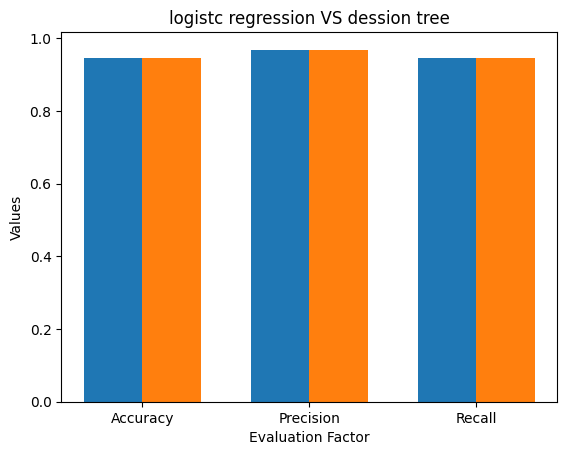

In [20]:
logistic = [accuracy_lr, precission_lr, recall_lr]
decission = [accuracy_dt, precission_dt, recall_dt]

bar_width = 0.35
index = range(len(logistic))

plt.bar(index, logistic, width=bar_width, label='Logistic Regression')
plt.bar([i + bar_width for i in index], decission, width=bar_width, label='Decision Tree')

plt.xlabel("Evaluation Factor")
plt.ylabel("Values")
plt.title("logistc regression VS dession tree")
plt.xticks([i + bar_width/2 for i in index], ['Accuracy', 'Precision', 'Recall'])
plt.show()
